# Strategic Thinking for Data Analysis - CA1

### Data Source

The source of the datasets is Kaggle, which provides public datasets for analysis. Two datasets generated from photovoltaic energy generation and temperature sensor data from two solar plants in India will be used. These datasets contain 34 days of generation data from the year 2020.

In order to facilitate and simplify the analysis, data from only one of the Photovoltaic Plants will be used.

**Dataset names:** Plant_1_Generation_Data and Plant_1_Weather_Data.


### Variable Identification
#### Generation data
- DATE_TIME - Date and time for each observation. Observations recorded at 15 minute intervals.
- PLANT_ID - Plant ID number.
- INVERTER - Inverter id.
- DC_POWER - Amount of DC power generated by the Inverter in this 15 minute interval (kW).
- AC_POWER - Amount of AC power generated by the Inverter in this 15 minute interval (kW).
- DAILY_YIELD - Daily yield is a cumulative sum of power generated on that day, till that point in time.
- TOTAL_YIELD - This is the total yield for the inverter till that point in time.

#### Tempearture and Solar Irradiation data
- DATE_TIME - Date and time for each observation. Observations recorded at 15 minute intervals.
- Plant ID - this will be common for the entire file.
- SENSOR - Stands for the sensor panel id.
- AMBIENT_TEMPERATURE - This is the ambient temperature at the plant.
- MODULE_TEMPERATURE - There is a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.
- IRRADIATION - Amount of irradiation for the 15 minute interval.

### Library Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport

# Data Preparation

### Datasets Reading

In [2]:
# Loading the Generation Data set 1
df_gen = pd.read_csv('Plant_1_Generation_Data.csv')
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [3]:
# Loading the Weather Data set 1
df_wth = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


### Converting the 'DATE_TIME' column to datetime type

In [4]:
df_gen['DATE_TIME']= pd.to_datetime(df_gen['DATE_TIME'],format='%d-%m-%Y %H:%M')
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
df_wth['DATE_TIME']= pd.to_datetime(df_wth['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


# Exploratory Data Analysis

Data Understanding, Cleaning, Preprocessing, and Various Analyses

###  Generation Data Sets Info

In [6]:
df_gen.shape

(68778, 7)

In [7]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


###  Weather Data Sets Info

In [8]:
df_wth.shape

(3182, 6)

In [9]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


### Checking for Null values

In [10]:
df_gen.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [11]:
df_wth.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

### Variable adjustment

### Changing the variable name

In [12]:
df_gen = df_gen.rename(columns={'SOURCE_KEY':'INVERTER'})
df_wth = df_wth.rename(columns={'SOURCE_KEY':'SENSOR'})

### Changing the variable type

#### Function imprimir_valores_unicos()
A function that prints the unique values of each variable.

In [13]:
def imprimir_valores_unicos(data_f):
    for coluna in data_f.columns:
        valores_unicos = data_f[coluna].unique()
        print(f"  {coluna} = {valores_unicos}")

In [14]:
imprimir_valores_unicos(df_gen)

  DATE_TIME = <DatetimeArray>
['2020-05-15 00:00:00', '2020-05-15 00:15:00', '2020-05-15 00:30:00',
 '2020-05-15 00:45:00', '2020-05-15 01:00:00', '2020-05-15 01:15:00',
 '2020-05-15 01:30:00', '2020-05-15 01:45:00', '2020-05-15 02:00:00',
 '2020-05-15 02:15:00',
 ...
 '2020-06-17 21:30:00', '2020-06-17 21:45:00', '2020-06-17 22:00:00',
 '2020-06-17 22:15:00', '2020-06-17 22:30:00', '2020-06-17 22:45:00',
 '2020-06-17 23:00:00', '2020-06-17 23:15:00', '2020-06-17 23:30:00',
 '2020-06-17 23:45:00']
Length: 3158, dtype: datetime64[ns]
  PLANT_ID = [4135001]
  INVERTER = ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE']
  DC_POWER = [  0.    

In [15]:
imprimir_valores_unicos(df_wth)

  DATE_TIME = <DatetimeArray>
['2020-05-15 00:00:00', '2020-05-15 00:15:00', '2020-05-15 00:30:00',
 '2020-05-15 00:45:00', '2020-05-15 01:00:00', '2020-05-15 01:15:00',
 '2020-05-15 01:30:00', '2020-05-15 01:45:00', '2020-05-15 02:00:00',
 '2020-05-15 02:15:00',
 ...
 '2020-06-17 21:30:00', '2020-06-17 21:45:00', '2020-06-17 22:00:00',
 '2020-06-17 22:15:00', '2020-06-17 22:30:00', '2020-06-17 22:45:00',
 '2020-06-17 23:00:00', '2020-06-17 23:15:00', '2020-06-17 23:30:00',
 '2020-06-17 23:45:00']
Length: 3182, dtype: datetime64[ns]
  PLANT_ID = [4135001]
  SENSOR = ['HmiyD2TTLFNqkNe']
  AMBIENT_TEMPERATURE = [25.18431613 25.08458867 24.9357526  ... 22.00827464 21.96949473
 21.90928767]
  MODULE_TEMPERATURE = [22.8575074  22.76166787 22.59230553 ... 20.70921136 20.7349628
 20.4279724 ]
  IRRADIATION = [0.00000000e+00 8.62721241e-04 5.88695719e-03 ... 2.34457015e-02
 7.00688981e-03 3.90831153e-05]


In [16]:
df_gen

,DATE_TIME,PLANT_ID,INVERTER,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [17]:
df_wth

,DATE_TIME,PLANT_ID,SENSOR,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Droping variables uniques

In [18]:
df_gen.drop(columns=['PLANT_ID'], inplace=True)
df_wth.drop(columns=['PLANT_ID'], inplace=True)
df_wth.drop(columns=['SENSOR'], inplace=True)

### Descriptive Statistics
Finding Mean, Median, Min and Max Values

In [19]:
df_gen.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,2020-06-01 08:02:49.458256896,3147.426211,307.802752,3295.968737,6.978712e+06
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.183645e+06
25%,2020-05-24 00:45:00,0.000000,0.000000,0.000000,6.512003e+06
50%,2020-06-01 14:30:00,429.000000,41.493750,2658.714286,7.146685e+06
75%,2020-06-09 20:00:00,6366.964286,623.618750,6274.000000,7.268706e+06
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,7.846821e+06
std,NaN,4036.457169,394.396439,3145.178309,4.162720e+05


In [20]:
df_wth.describe()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182,3182.000000,3182.000000,3182.000000
mean,2020-06-01 05:52:22.080452608,25.531606,31.091015,0.228313
min,2020-05-15 00:00:00,20.398505,18.140415,0.000000
25%,2020-05-23 22:48:45,22.705182,21.090553,0.000000
50%,2020-06-01 09:52:30,24.613814,24.618060,0.024653
75%,2020-06-09 16:56:15,27.920532,41.307840,0.449588
max,2020-06-17 23:45:00,35.252486,65.545714,1.221652
std,NaN,3.354856,12.261222,0.300836


In [21]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   INVERTER     68778 non-null  object        
 2   DC_POWER     68778 non-null  float64       
 3   AC_POWER     68778 non-null  float64       
 4   DAILY_YIELD  68778 non-null  float64       
 5   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.1+ MB


In [22]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3182 non-null   float64       
 2   MODULE_TEMPERATURE   3182 non-null   float64       
 3   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 99.6 KB


### Profile Report

In [23]:
#ProfileReport(df_gen)

In [24]:
#ProfileReport(df_wth)

In [25]:
plant1_data=df_gen
plant1_data = plant1_data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum')
plant1_data = plant1_data.reset_index()
plant1_data['DATE_TIME'] = pd.to_datetime(plant1_data['DATE_TIME'], errors='coerce')
plant1_data['time'] = plant1_data['DATE_TIME'].dt.time
plant1_data['date'] = pd.to_datetime(plant1_data['DATE_TIME'].dt.date)

In [26]:
plant1_sensor=df_wth
plant1_sensor['DATE_TIME'] = pd.to_datetime(plant1_sensor['DATE_TIME'], errors='coerce')
# same work cleaning data
plant1_sensor['date'] = pd.to_datetime(pd.to_datetime(plant1_sensor['DATE_TIME']).dt.date)
plant1_sensor['time'] = pd.to_datetime(plant1_sensor['DATE_TIME']).dt.time


### DC Power Grafics

Text(0.5, 1.0, 'DC_POWER Histogram')

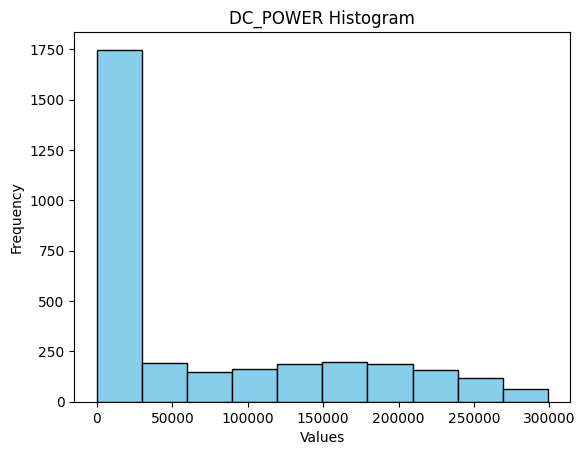

In [27]:
### Plotting the histogram
plt.hist(plant1_data['DC_POWER'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('DC_POWER Histogram')


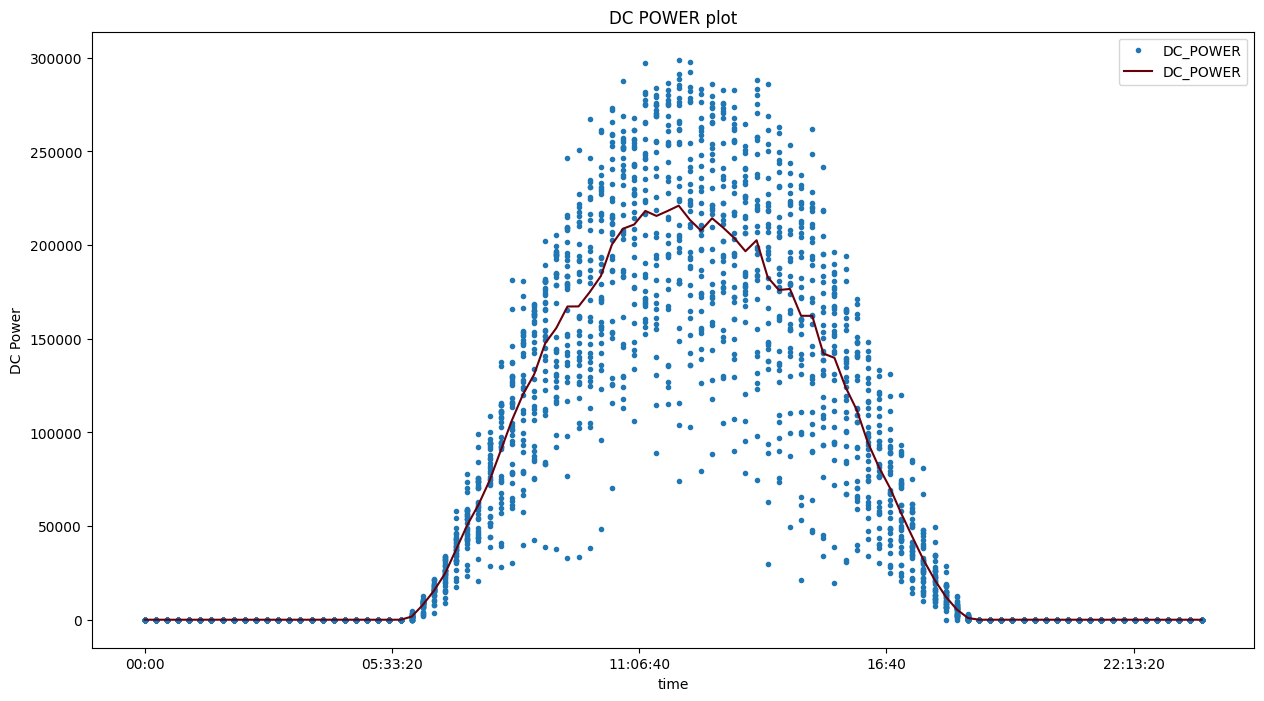

In [28]:
plant1_data.plot(x= 'time', y='DC_POWER', style='.', figsize = (15, 8))
plant1_data.groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

### Daily Yield

Text(0.5, 1.0, 'DAILY_YIELD Histogram')

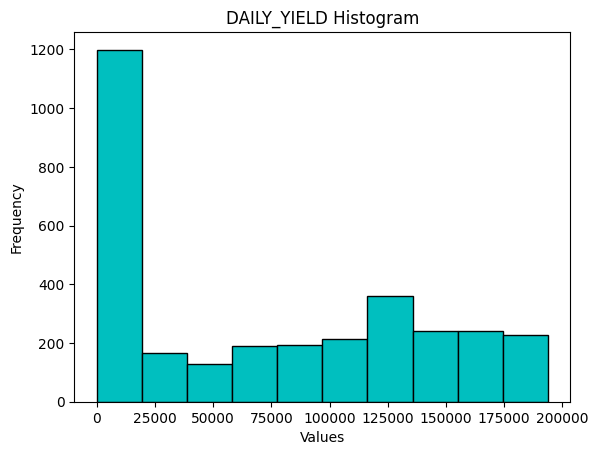

In [29]:
# Plotting the histogram
plt.hist(plant1_data['DAILY_YIELD'], bins=10, color='c', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('DAILY_YIELD Histogram')

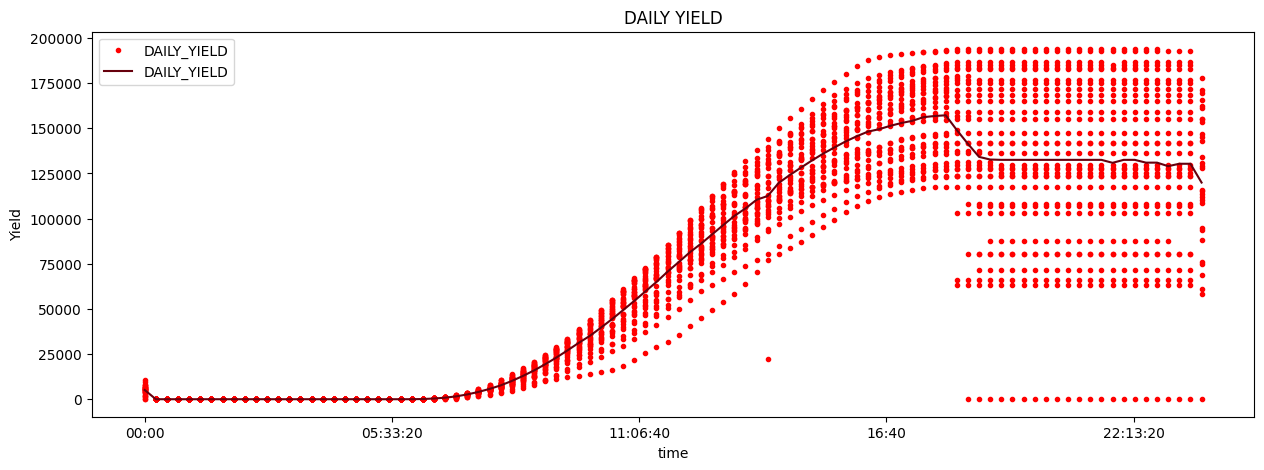

In [30]:
plant1_data.plot(x='time', y='DAILY_YIELD', style='r.', figsize=(15,5))
plant1_data.groupby('time')['DAILY_YIELD'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('DAILY YIELD')
plt.ylabel('Yield')
plt.show()

Text(0, 0.5, 'kW')

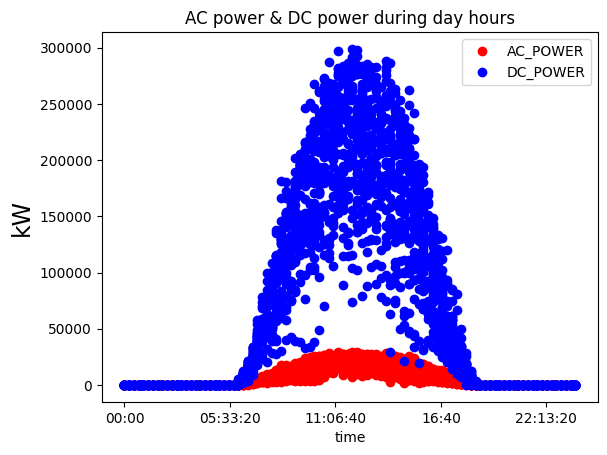

In [31]:
df_daily_gen = df_gen.groupby('DATE_TIME').sum().reset_index()
df_daily_gen['time'] = df_daily_gen['DATE_TIME'].dt.time

# Remover a coluna 'DATE_TIME' do DataFrame e definir 'time' como o novo índice
df_daily_gen.set_index('time', inplace=True)
df_daily_gen.drop(columns=['DATE_TIME'], inplace=True)

# Plotar AC_POWER e DC_POWER
ax = df_daily_gen[['AC_POWER', 'DC_POWER']].plot(style='o', color=["r", 'b'])

ax.set_title('AC power & DC power during day hours')
ax.set_ylabel('kW', fontsize=17)

### Daily Yield

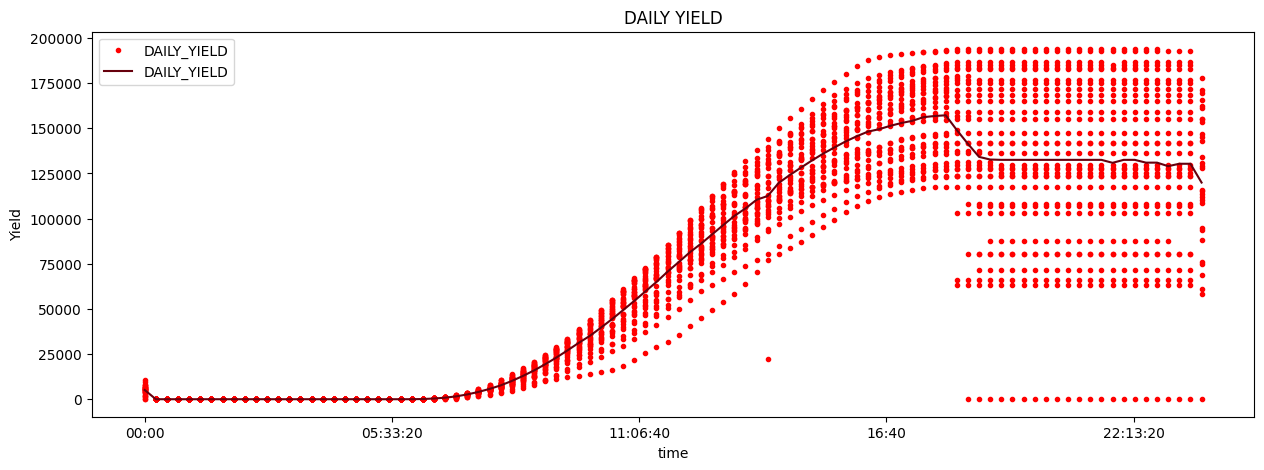

In [33]:
plant1_data.plot(x='time', y='DAILY_YIELD', style='r.', figsize=(15,5))
plant1_data.groupby('time')['DAILY_YIELD'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('DAILY YIELD')
plt.ylabel('Yield')
plt.show()

### Daily Yield and AC-DC Power
Transforma os dados originais em um novo DataFrame (df_daily_gen), agrupando os valores para cada intervalo de tempo e adicionando uma coluna adicional ('time') para permitir análises baseadas em tempo.


Text(0, 0.5, 'kW')

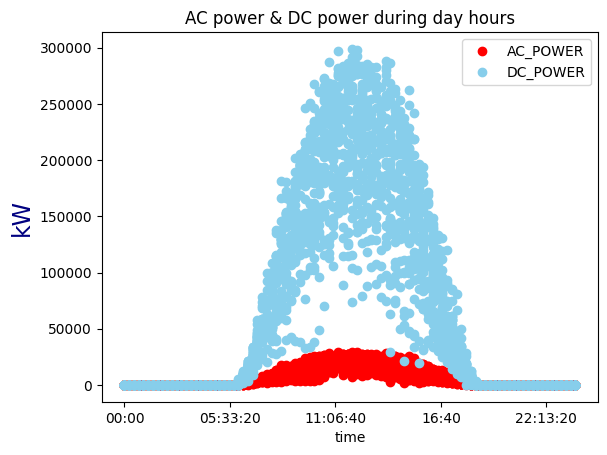

In [37]:
# Agrupa os dados do DataFrame pela coluna 'DATE_TIME' e
# redefine o índice do DataFrame
df_daily_gen = df_gen.groupby('DATE_TIME').sum().reset_index()

#Cria nova coluna 'time' no DataFrame
df_daily_gen['time'] = df_daily_gen['DATE_TIME'].dt.time

# Remover a coluna 'DATE_TIME' do DataFrame e definir 'time' como o novo índice
df_daily_gen.set_index('time', inplace=True)
df_daily_gen.drop(columns=['DATE_TIME'], inplace=True)

# Plotar AC_POWER e DC_POWER
ax = df_daily_gen[['AC_POWER', 'DC_POWER']].plot(style='o', color=["r", 'skyblue'])

ax.set_title('AC power & DC power during day hours')
ax.set_ylabel('kW', color='navy', fontsize=17)